In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.6.0'

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Thu Sep 30 07:10:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    73W / 149W |    121MiB / 11441MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Sep 15 01:08 '/content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [7]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  infl

In [8]:
!ls -l

total 20
drwx------ 5 root root 4096 Sep 30 06:59 drive
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwxr-xr-x 4 root root 4096 Sep 30 07:11 test
drwxr-xr-x 4 root root 4096 Sep 30 07:11 train
drwxr-xr-x 4 root root 4096 Sep 30 07:11 validation


In [9]:
train_dir = 'train'
valid_dir='validation'
test_dir = 'test'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150,150),
                  batch_size=20,
                  class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode ='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [13]:
labels_batch

array([1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0.], dtype=float32)

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch =100,
                       epochs = 60,
                       validation_data=valid_generator,
                       validation_steps =50)

Epoch 1/60
100/100 [==============================] - 43s 108ms/step - loss: 0.6994 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 11s 109ms/step - loss: 0.6934 - accuracy: 0.4915 - val_loss: 0.6914 - val_accuracy: 0.5640
Epoch 3/60
100/100 [==============================] - 11s 108ms/step - loss: 0.6836 - accuracy: 0.5540 - val_loss: 0.6741 - val_accuracy: 0.5400
Epoch 4/60
100/100 [==============================] - 11s 108ms/step - loss: 0.6882 - accuracy: 0.5400 - val_loss: 0.6921 - val_accuracy: 0.5340
Epoch 5/60
100/100 [==============================] - 11s 108ms/step - loss: 0.6920 - accuracy: 0.5235 - val_loss: 0.6857 - val_accuracy: 0.5240
Epoch 6/60
100/100 [==============================] - 11s 109ms/step - loss: 0.6777 - accuracy: 0.5735 - val_loss: 0.6798 - val_accuracy: 0.5790
Epoch 7/60
100/100 [==============================] - 11s 108ms/step - loss: 0.6681 - accuracy: 0.5905 - val_loss: 0.6360 - val_ac

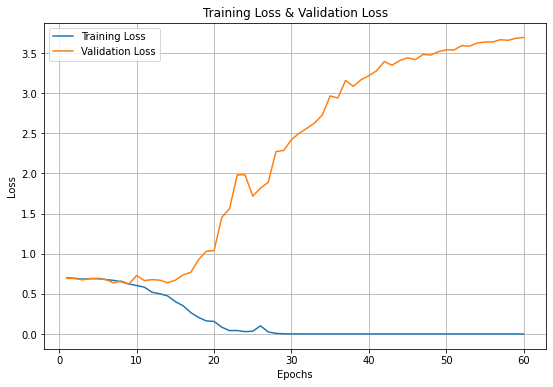

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training Loss & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

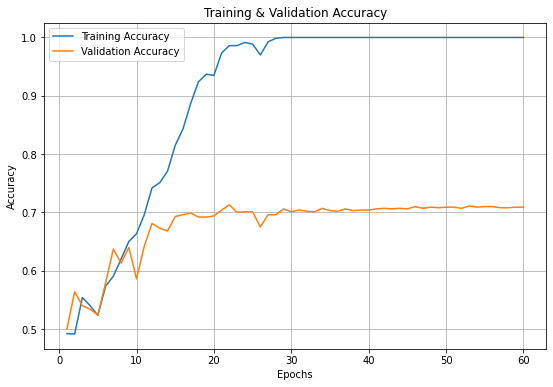

In [21]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(150,150),
                 batch_size=20,
                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
loss, accuracy = model.evaluate(test_generator,
                                steps =50)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 63ms/step - loss: 4.2752 - accuracy: 0.6900
Loss=4.27515
Accuracy = 0.69000


In [25]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [27]:
!ls -l /content/drive/MyDrive/Colab\ Notebooks/models

total 40527
-rw------- 1 root root 41498784 Sep 30 07:43 002_dogs_and_cats_small.h5


In [28]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/MyDrive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [29]:
loss, accuracy = model_small.evaluate(test_generator,
                                steps =50)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 63ms/step - loss: 4.2752 - accuracy: 0.6900
Loss=4.27515
Accuracy = 0.69000


#The End#